# Online Retail Shipping Analysis

## Importing Necessary Module

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Dictionary

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:


- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Business Background
### NanoTech Global E-commerce Leader in Electronics

NanoTech is a leading online retailer specializing in a wide range of electronic products. NanoTech operate in a highly competitibe global market with tight margin. To stay ahead, NanoTech needs to optimize their fulfillment processes and improve on-time delivery rates. Additionally, we want to gain a deeper understanding of our customer base to improve shipping ontime and enhance overall customer satisfaction.

## Business Problem
NanoTech is a global e-commerce retail business focusing on a wide variety of electronic products. NanoTech discover that there is a problem in the rate of ontime delivery time. And NanoTech want to investigate where is the problem and what to improve and if its effecting the overall customer satisfaction.

## Importing the Database, Checking, Cleaning, and Manipulating

In [106]:
df = pd.read_csv("./Online Retail Shipping/Online Retail Shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [108]:
df.shape

(10999, 12)

In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


### Checking Null Values

In [110]:
# Checking for Null values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Checking Duplicate Values

In [111]:
# Checking for Duplicates 
df.duplicated().sum()

0

In [112]:
df["ID"].duplicated().sum()

0

### Checking for Typos

In [113]:
# Checking for typos
df["Product_importance"].value_counts().reset_index()

,Product_importance,count
0,low,5297
1,medium,4754
2,high,948


In [114]:
# Checking for typos
df["Mode_of_Shipment"].value_counts().reset_index()

,Mode_of_Shipment,count
0,Ship,7462
1,Flight,1777
2,Road,1760


In [115]:
# Checking for typos
df["Gender"].value_counts().reset_index()

,Gender,count
0,F,5545
1,M,5454


In [116]:
# Checking for typos
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,F,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


In the data description, the warehoust consists of warehouse block A, B, C, D and E. But the data shows warehouse block F. Let's rename it from warehouse F to warehouse E.

In [117]:
df['Warehouse_block'].replace({"F":"E"}, inplace=True)
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,E,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


### Checking for Outliers

In [118]:
# Creating a New Dataframe to Check for Outliers and Correlation
df_check = df[["Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Discount_offered", "Weight_in_gms", "Reached.on.Time_Y.N"]]
df_check

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


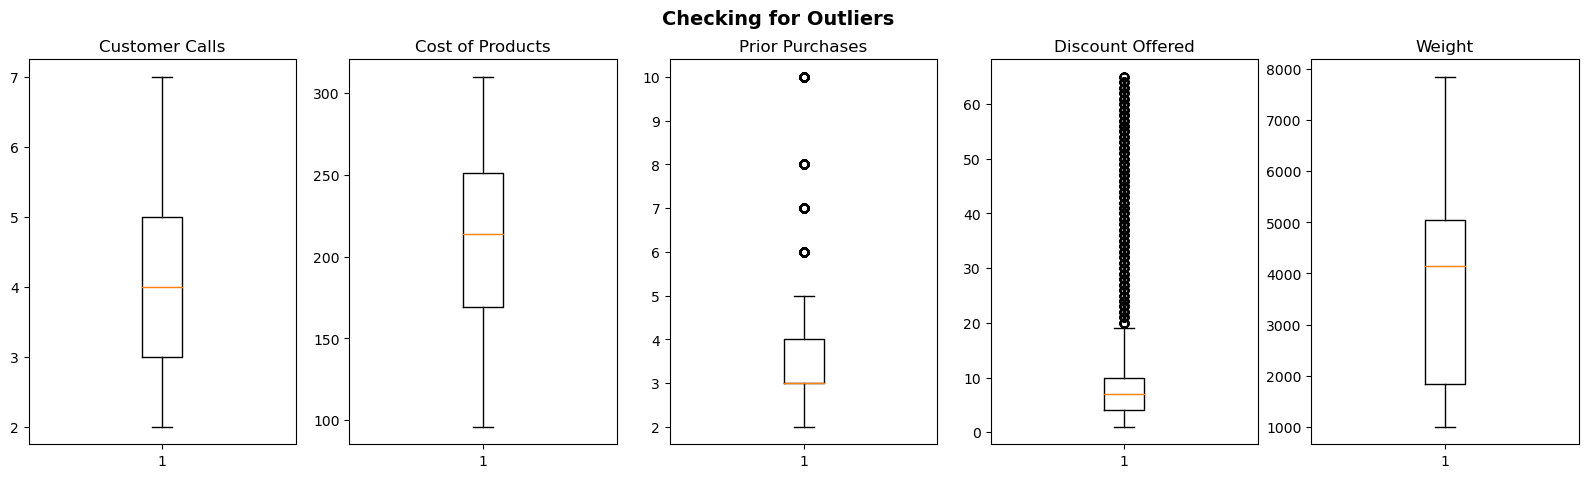

In [119]:
# Checking for outliers
figure, axes = plt.subplots(1, 5, figsize=(20, 5))
figure.suptitle("Checking for Outliers", size=14, fontweight="bold")

axes[0].boxplot(df_check["Customer_care_calls"])
axes[0].set_title("Customer Calls")

axes[1].boxplot(df_check["Cost_of_the_Product"])
axes[1].set_title("Cost of Products")

axes[2].boxplot(df_check["Prior_purchases"])
axes[2].set_title("Prior Purchases")

axes[3].boxplot(df_check["Discount_offered"])
axes[3].set_title("Discount Offered")

axes[4].boxplot(df_check["Weight_in_gms"])
axes[4].set_title("Weight")

plt.show()


In [120]:
# Customer Calls IQR
cc_q1 = df["Customer_care_calls"].quantile(0.25)
cc_q3 = df["Customer_care_calls"].quantile(0.75)
IQR = cc_q3 - cc_q1

print(f"Q1: {cc_q1}")
print(f"Q3: {cc_q3}")
print(f"IQR: {IQR}")

Q1: 3.0
Q3: 5.0
IQR: 2.0


In [121]:
# Customer Calls Outliers
lower_bound = cc_q1 - 1.5 * IQR
upper_bound = cc_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Customer_care_calls"] < lower_bound) | (df["Customer_care_calls"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Customer_care_calls"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 0.0
Upper bound for outliers: 8.0
Count of outliers: 0


In [122]:
# Cost of Products IQR
cp_q1 = df["Cost_of_the_Product"].quantile(0.25)
cp_q3 = df["Cost_of_the_Product"].quantile(0.75)
IQR = cp_q3 - cp_q1

print(f"Q1: {cp_q1}")
print(f"Q3: {cp_q3}")
print(f"IQR: {IQR}")

Q1: 169.0
Q3: 251.0
IQR: 82.0


In [123]:
# Cost of Products Outliers
lower_bound = cp_q1 - 1.5 * IQR
upper_bound = cp_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Cost_of_the_Product"] < lower_bound) | (df["Cost_of_the_Product"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Cost_of_the_Product"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 46.0
Upper bound for outliers: 374.0
Count of outliers: 0


In [124]:
# Prior Purchases IQR
pp_q1 = df["Prior_purchases"].quantile(0.25)
pp_q3 = df["Prior_purchases"].quantile(0.75)
IQR = pp_q3 - pp_q1

print(f"Q1: {pp_q1}")
print(f"Q3: {pp_q3}")
print(f"IQR: {IQR}")

Q1: 3.0
Q3: 4.0
IQR: 1.0


In [125]:
# Prior Purchases Outliers
lower_bound = pp_q1 - 1.5 * IQR
upper_bound = pp_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Prior_purchases"] < lower_bound) | (df["Prior_purchases"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Prior_purchases"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: 1.5
Upper bound for outliers: 5.5
Count of outliers: 1003


In [126]:
# Discount Offered IQR
do_q1 = df["Discount_offered"].quantile(0.25)
do_q3 = df["Discount_offered"].quantile(0.75)
IQR = do_q3 - do_q1

print(f"Q1: {do_q1}")
print(f"Q3: {do_q3}")
print(f"IQR: {IQR}")

Q1: 4.0
Q3: 10.0
IQR: 6.0


In [127]:
# Discount Offered Outliers
lower_bound = do_q1 - 1.5 * IQR
upper_bound = do_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Discount_offered"] < lower_bound) | (df["Discount_offered"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Discount_offered"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: -5.0
Upper bound for outliers: 19.0
Count of outliers: 2209


In [128]:
# Weight Offered IQR
w_q1 = df["Weight_in_gms"].quantile(0.25)
w_q3 = df["Weight_in_gms"].quantile(0.75)
IQR = w_q3 - w_q1

print(f"Q1: {w_q1}")
print(f"Q3: {w_q3}")
print(f"IQR: {IQR}")

Q1: 1839.5
Q3: 5050.0
IQR: 3210.5


In [129]:
# Product Weight Outliers
lower_bound = w_q1 - 1.5 * IQR
upper_bound = w_q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identifying outliers
outliers = df[(df["Weight_in_gms"] < lower_bound) | (df["Weight_in_gms"] > upper_bound)]

# Calculating and printing the sum of the outliers
outliers_sum = outliers["Weight_in_gms"].shape[0]
print(f"Count of outliers: {outliers_sum}")

Lower bound for outliers: -2976.25
Upper bound for outliers: 9865.75
Count of outliers: 0


We found in the prior purchase column that around 1003 customer are above our upper bound of outlier. This could be a reguler customer or a loyal customer. So we should keep the outliers. The same with disount offered, there is around 2209 customer with the discount offer above 19%. Let's keep the outlier so we can identify why the discount amount didn't convert into purchases.

## EDA

In [130]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,E,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Let's create a new column for product arrival, is it late or ontime. According to the data dictionary, 1 is late and 0 is on time.

In [131]:
df["Late_or_ontime"] = df["Reached.on.Time_Y.N"].map({1:"Late", 0:"Ontime"})
df[["Reached.on.Time_Y.N","Late_or_ontime"]].reset_index()

,index,Reached.on.Time_Y.N,Late_or_ontime
0,0,1,Late
1,1,1,Late
2,2,1,Late
3,3,1,Late
4,4,1,Late
...,...,...,...
10994,10994,1,Late
10995,10995,0,Ontime
10996,10996,0,Ontime
10997,10997,0,Ontime


In [132]:
df["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Late_or_ontime,proportion
0,Late,0.596691
1,Ontime,0.403309


With the table above we can see a business problem. We have a problem where the products is late on arrival is more than the products that were on time. Let's identify where posibility of the problem occur.

We also need to analyze our customer satisfaction. Is the late product arrival affect their satisfaction towards our service or there is other variable that affect customer satisfaction? Let's make a new column with the value to track the customer satisfaction rate based on Customer rating column. I define 1-2 rating as dissatisfied, 3 as neutral and 4-5 as satisfied.

In [133]:
df["Customer_satisfaction"] = df["Customer_rating"].apply(lambda x: "Dissatisfied" if x in [1, 2] else ("Neutral" if x == 3 else "Satisfied"))
df[["Customer_rating", "Customer_satisfaction"]].reset_index()


,index,Customer_rating,Customer_satisfaction
0,0,2,Dissatisfied
1,1,5,Satisfied
2,2,2,Dissatisfied
3,3,3,Neutral
4,4,2,Dissatisfied
...,...,...,...
10994,10994,1,Dissatisfied
10995,10995,1,Dissatisfied
10996,10996,4,Satisfied
10997,10997,2,Dissatisfied


In [134]:
df["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_satisfaction,proportion
0,Dissatisfied,0.400036
1,Satisfied,0.396400
2,Neutral,0.203564


With the table above we can see a business problem. We have a problem where we have more customers that are neutral or dissatisfied than satisfied. Let's identify where posibility of the problem occur.

In [135]:
df["Prior_purchases"].describe()

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Prior_purchases, dtype: float64

To ease our customer segmentation. Let's devide the customer into three category based on their prior purchases. 1-3 is occasional buyer, 4-6 is regular, and 7-10 is a Loyal customer.

In [136]:
df["Customer_segmentation"] = df["Prior_purchases"].apply(lambda x: "Occasional" if x in [1, 2, 3] else ("Regular" if x in [4, 5, 6] else "Loyal"))
df[["Prior_purchases","Customer_segmentation"]].reset_index()

,index,Prior_purchases,Customer_segmentation
0,0,3,Occasional
1,1,2,Occasional
2,2,4,Regular
3,3,4,Regular
4,4,3,Occasional
...,...,...,...
10994,10994,5,Regular
10995,10995,5,Regular
10996,10996,5,Regular
10997,10997,6,Regular


In [137]:
df["Customer_segmentation"].value_counts(normalize=True).reset_index()

,Customer_segmentation,proportion
0,Occasional,0.595872
1,Regular,0.363942
2,Loyal,0.040185


In [138]:
df["Weight_category"] = df["Weight_in_gms"].apply(lambda x: "Lightweight" if 1000 <= x <= 3000 else ("Medium weight" if 3001 <= x <= 5000 else "Heavy weight"))
df[["Weight_in_gms","Weight_category"]].reset_index()

,index,Weight_in_gms,Weight_category
0,0,1233,Lightweight
1,1,3088,Medium weight
2,2,3374,Medium weight
3,3,1177,Lightweight
4,4,2484,Lightweight
...,...,...,...
10994,10994,1538,Lightweight
10995,10995,1247,Lightweight
10996,10996,1155,Lightweight
10997,10997,1210,Lightweight


### Looking at each individual column

In [139]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Late_or_ontime,Customer_satisfaction,Customer_segmentation,Weight_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Late,Dissatisfied,Occasional,Lightweight
1,2,E,Flight,4,5,216,2,low,M,59,3088,1,Late,Satisfied,Occasional,Medium weight
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Late,Dissatisfied,Regular,Medium weight
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Late,Neutral,Regular,Lightweight
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Late,Dissatisfied,Occasional,Lightweight
5,6,E,Flight,3,1,162,3,medium,F,12,1417,1,Late,Dissatisfied,Occasional,Lightweight
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,Late,Satisfied,Occasional,Lightweight
7,8,E,Flight,4,1,233,2,low,F,48,2804,1,Late,Dissatisfied,Occasional,Lightweight
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,Late,Satisfied,Occasional,Lightweight
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1,Late,Dissatisfied,Occasional,Lightweight


#### Correlation Between Variable
Looking into each column, is there significant relation between each column?


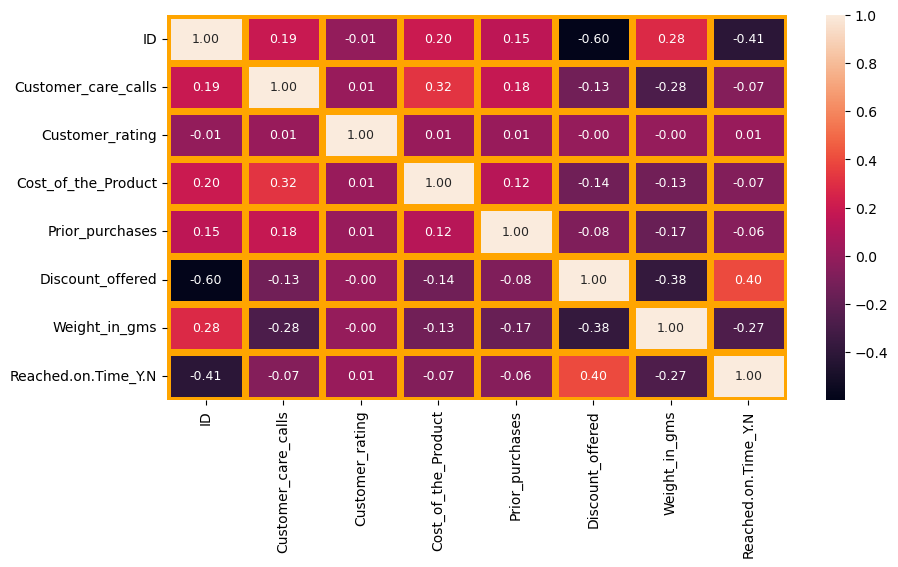

In [140]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '0.2f', annot_kws = {'size' : 9}, linewidth = 5, linecolor = 'orange')
plt.show()

#### Distribution of Columns

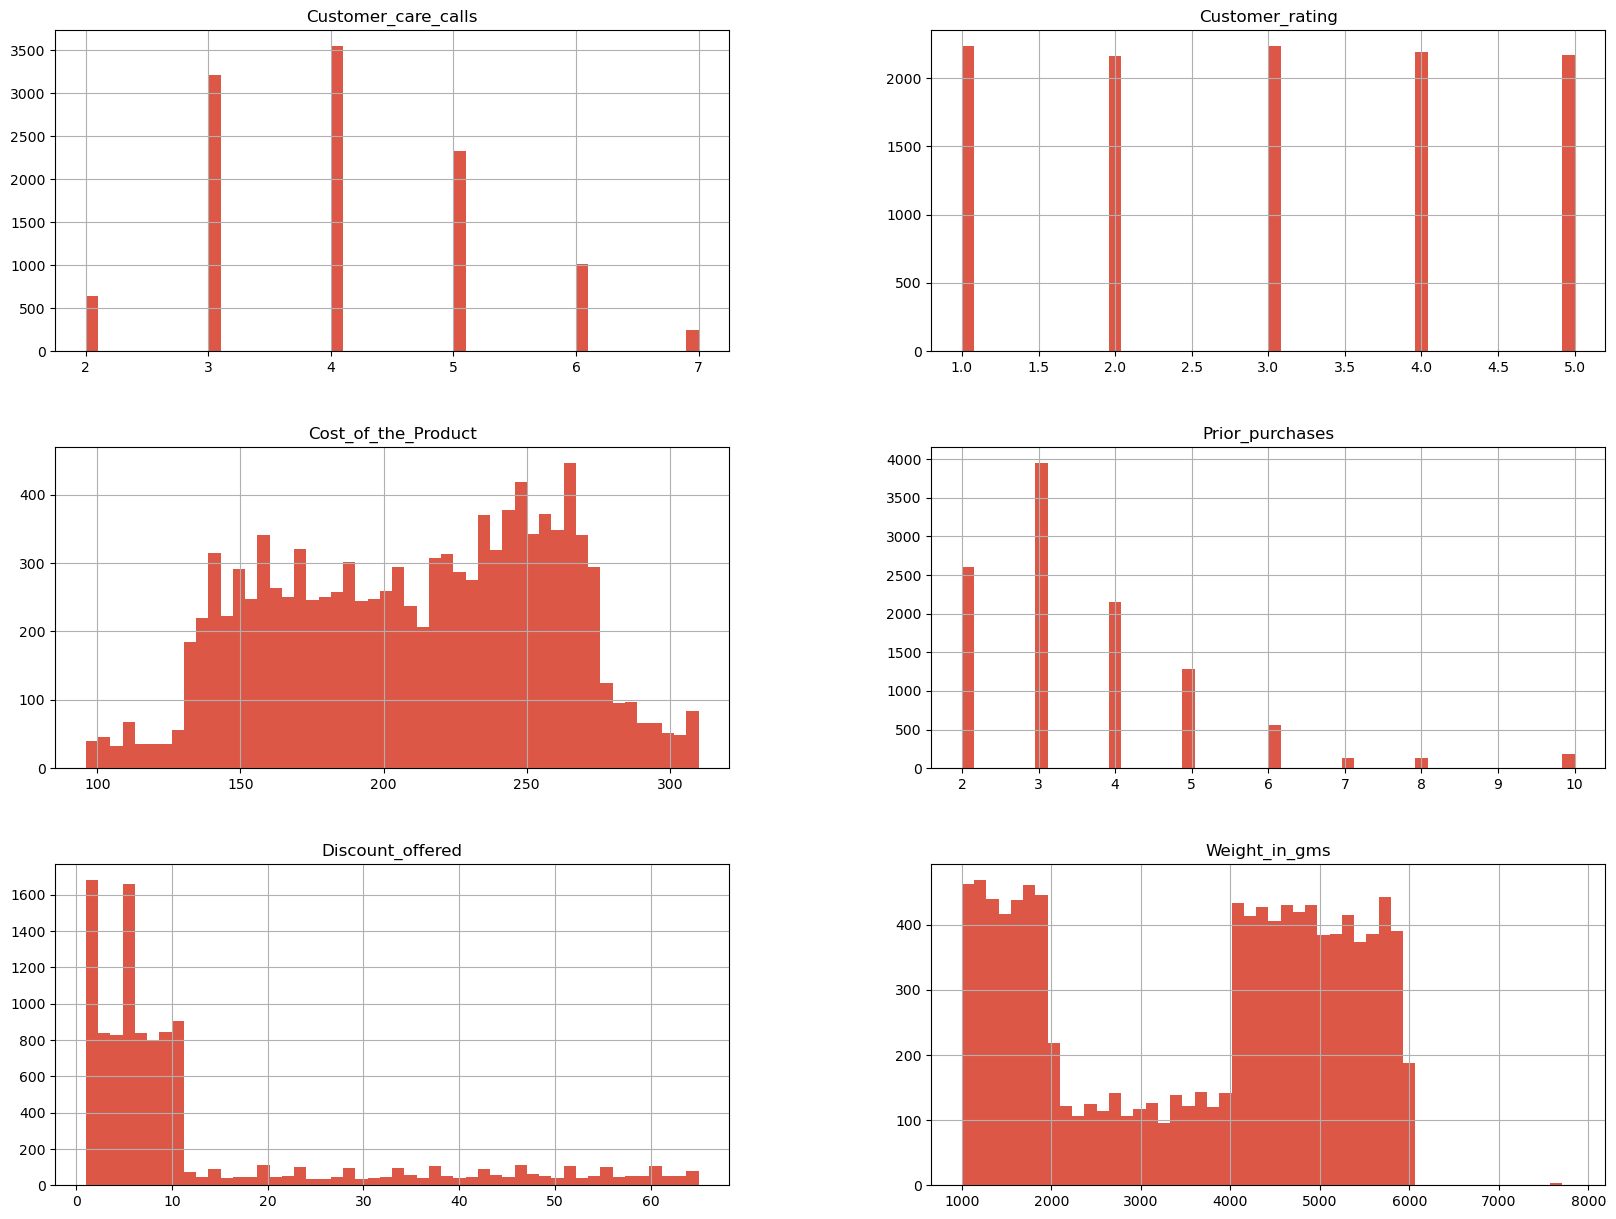

In [141]:
# Plot a histogram for each numerical attribute
df_plot = df.drop(["ID", "Reached.on.Time_Y.N"], axis = 1)
df_plot.hist(figsize=(20,15), bins=50, color="#DD5746")
plt.show()

Since all of the numerical data doesn't have a normal distribution, we can use median as a centre of measure. Except for customer rating let's just use average since it's only 5.

#### Warehouse Block

In [142]:
# Number of Products in each Warehouse Block
df["Warehouse_block"].value_counts().reset_index()

,Warehouse_block,count
0,E,3666
1,D,1834
2,A,1833
3,B,1833
4,C,1833


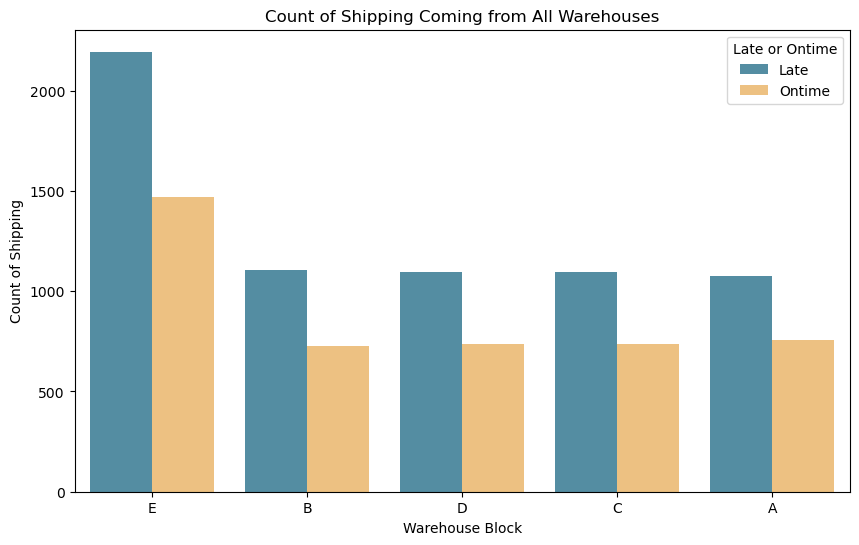

In [143]:
# Number of Products in each Warehouse Block and its arrival time
df_wh = df[["Warehouse_block", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_wh, x = "Warehouse_block", y = "count", hue="Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping Coming from All Warehouses")
plt.xlabel("Warehouse Block")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [144]:
df.groupby(["Warehouse_block"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Warehouse_block,Late_or_ontime,proportion
0,A,Late,0.586470
1,A,Ontime,0.413530
2,B,Late,0.602291
3,B,Ontime,0.397709
4,C,Late,0.596836
5,C,Ontime,0.403164
6,D,Late,0.597601
7,D,Ontime,0.402399
8,E,Late,0.598472
9,E,Ontime,0.401528


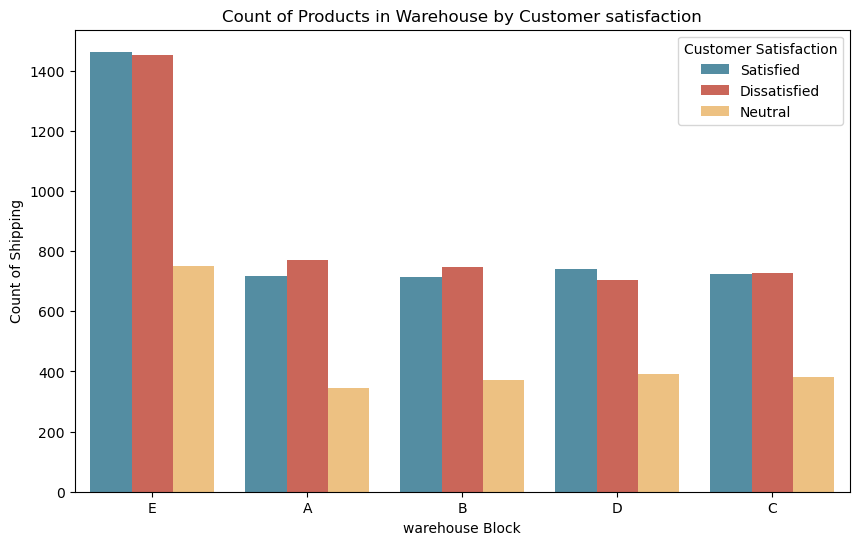

In [198]:
# Number of Products in each Shipping Method and customer satisfaction
df_wh = df[["Warehouse_block", "Customer_satisfaction"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_wh, x = "Warehouse_block", y = "count", hue="Customer_satisfaction", palette=["#4793AF", "#DD5746", "#FFC470"])
plt.title("Count of Products in Warehouse by Customer satisfaction")
plt.xlabel("warehouse Block")
plt.ylabel("Count of Shipping")
plt.legend(title="Customer Satisfaction")
plt.show()

In [207]:
df.groupby(['Warehouse_block', 'Product_importance']).size().reset_index(name='counts').sort_values(by=["Product_importance", "Warehouse_block"])

,Warehouse_block,Product_importance,counts
0,A,high,165
3,B,high,146
6,C,high,168
9,D,high,166
12,E,high,303
1,A,low,909
4,B,low,855
7,C,low,874
10,D,low,883
13,E,low,1776


In [148]:
df.groupby(["Warehouse_block"])[["Cost_of_the_Product", "Weight_in_gms"]].median().sort_values(by = "Cost_of_the_Product", ascending= False)

,Cost_of_the_Product,Weight_in_gms
Warehouse_block,,
B,219.0,4149.0
D,216.0,4134.5
C,214.0,4182.0
E,213.0,4153.5
A,212.0,4127.0


In [149]:
df.groupby(["Warehouse_block", "Weight_category"]).size().reset_index(name='count').sort_values(by=['Warehouse_block', 'count'], ascending=False)

,Warehouse_block,Weight_category,count
13,E,Lightweight,1385
14,E,Medium weight,1297
12,E,Heavy weight,984
11,D,Medium weight,695
10,D,Lightweight,681
9,D,Heavy weight,458
7,C,Lightweight,692
8,C,Medium weight,669
6,C,Heavy weight,472
4,B,Lightweight,688


Insights that we can get is,
1. Warehouse E store double the products than the other warehouse. Also warehouse E containing the most high importance of product. We can assume that warehouse E is a superwarehouse. Since its a superwarehouse, we can improve the effectiveness of the product distribution by adding more personel to handle light and medium weight product and forklift to handle the heavy weight products.
2. Products that came from all 5 warehouses all arrive late more than on time. This suggest there is a possibility a lack of efficient and effective procedure in handling the products in the warehouse and when the products comes out from the warehouse.
3. Warehouse E and D has the most satisfied rating out of all warehouses.
4. Average Cost of the product and its weights are closely distributed in all the warehouses.
5. Warehouse A has the lowest late arrival rate. Even though all the warehouses has a problem in effectiveness and efficiency in its product handling that causes the possibility of the late arrival proportion is higher. We can give a recommendation to improve the handling in and out of the products in each of the warehouses.
6. Warehouse B has the highest late arrival rate of 60%. If we see the products that stored in warehouse B is mostly lightweight and medium weight. Maybe we can add more personel to improve the products management in warehouse B.
7. Improve the first in first out method in each of the warehouse to reduce unsold products.
8. Customer seems more satisfied than neutral, many of them also dissatisfied. This could be because of the product delivery time or the quality of the product.

#### Mode of Shipment

In [150]:
# Number of Products in each Warehouse Block
df["Mode_of_Shipment"].value_counts().reset_index()

,Mode_of_Shipment,count
0,Ship,7462
1,Flight,1777
2,Road,1760


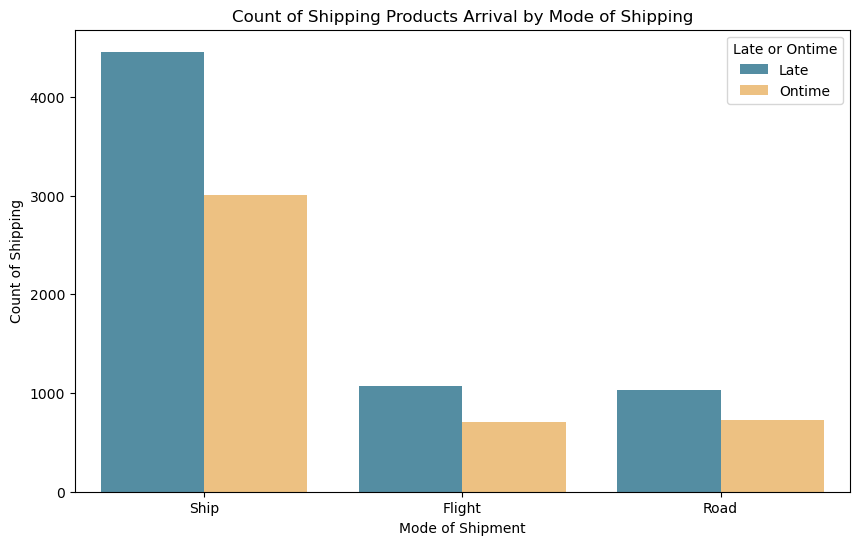

In [151]:
# Number of Products in each Shipping Method and its arrival time
df_sh = df[["Mode_of_Shipment", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_sh, x = "Mode_of_Shipment", y = "count", hue="Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping Products Arrival by Mode of Shipping")
plt.xlabel("Mode of Shipment")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [152]:
df.groupby(["Mode_of_Shipment"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Mode_of_Shipment,Late_or_ontime,proportion
0,Flight,Late,0.601576
1,Flight,Ontime,0.398424
2,Road,Late,0.588068
3,Road,Ontime,0.411932
4,Ship,Late,0.597561
5,Ship,Ontime,0.402439


In [153]:
df.groupby(['Mode_of_Shipment', 'Product_importance']).size().reset_index(name='counts').sort_values(by="Product_importance", ascending=False)

,Mode_of_Shipment,Product_importance,counts
2,Flight,medium,776
5,Road,medium,745
8,Ship,medium,3233
1,Flight,low,838
4,Road,low,857
7,Ship,low,3602
0,Flight,high,163
3,Road,high,158
6,Ship,high,627


In [154]:
df.groupby(['Mode_of_Shipment', 'Weight_category']).size().reset_index(name='counts').sort_values(by="Weight_category", ascending=False)

,Mode_of_Shipment,Weight_category,counts
2,Flight,Medium weight,688
5,Road,Medium weight,627
8,Ship,Medium weight,2651
1,Flight,Lightweight,660
4,Road,Lightweight,668
7,Ship,Lightweight,2816
0,Flight,Heavy weight,429
3,Road,Heavy weight,465
6,Ship,Heavy weight,1995


Most of the product use ship as the shipping method.


In [155]:
df.groupby(["Mode_of_Shipment"])[["Cost_of_the_Product", "Weight_in_gms"]].agg(["median"]).reset_index()

,Mode_of_Shipment,Cost_of_the_Product,Weight_in_gms
,,median,median
0,Flight,214.0,4152.0
1,Road,216.0,4194.5
2,Ship,214.0,4141.5


In [156]:
df.groupby(["Mode_of_Shipment"])[["Weight_in_gms"]].agg(["median"]).reset_index()

,Mode_of_Shipment,Weight_in_gms
,,median
0,Flight,4152.0
1,Road,4194.5
2,Ship,4141.5


In [157]:
df.groupby(["Mode_of_Shipment"])[["Customer_satisfaction"]].value_counts().reset_index()

,Mode_of_Shipment,Customer_satisfaction,count
0,Flight,Dissatisfied,731
1,Flight,Satisfied,716
2,Flight,Neutral,330
3,Road,Satisfied,709
4,Road,Dissatisfied,708
5,Road,Neutral,343
6,Ship,Dissatisfied,2961
7,Ship,Satisfied,2935
8,Ship,Neutral,1566


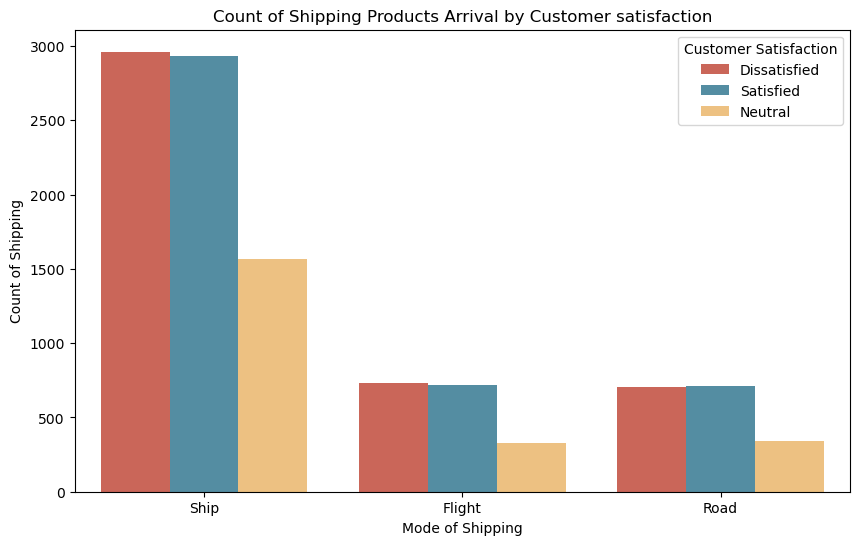

In [208]:
# Number of Products in each Shipping Method and customer satisfaction
df_sc = df[["Mode_of_Shipment", "Customer_satisfaction"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = df_sc, x = "Mode_of_Shipment", y = "count", hue="Customer_satisfaction", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Count of Shipping Products Arrival by Customer satisfaction")
plt.xlabel("Mode of Shipping")
plt.ylabel("Count of Shipping")
plt.legend(title="Customer Satisfaction")
plt.show()

Insights that we can get is,
1. Ocean freight or ship is mostly used as the mode of shipping accross 3 possible mode follow with flight and road haul. Ocean freight takes the longest time to deliver, it could be the cause of the product late arrival.
2. Products using all of the shipping mode arrive late more than ontime.
3. Products with a high importance mostly use ship/ocean freight as their mode of shipment.
4. Average cost of the products and its weights all closely distribute accross all of the mode of shipment.
5. Satisfied and dissatisfide based on its shipping mode a closely distributed, followed by nutral rating. This could be because of the delivery time or quality of the product.

### Looking Into the Product


In [159]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Late_or_ontime,Customer_satisfaction,Customer_segmentation,Weight_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Late,Dissatisfied,Occasional,Lightweight
1,2,E,Flight,4,5,216,2,low,M,59,3088,1,Late,Satisfied,Occasional,Medium weight
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Late,Dissatisfied,Regular,Medium weight
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Late,Neutral,Regular,Lightweight
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Late,Dissatisfied,Occasional,Lightweight


In [160]:
df["Product_importance"].value_counts().reset_index()

,Product_importance,count
0,low,5297
1,medium,4754
2,high,948


In [161]:
df.groupby(["Product_importance"])[["Cost_of_the_Product"]].agg(["median"]).reset_index()

,Product_importance,Cost_of_the_Product
,,median
0,high,205.5
1,low,218.0
2,medium,213.0


In [162]:
df.groupby(["Warehouse_block"])[["Cost_of_the_Product", "Weight_in_gms"]].median().sort_values(by = "Cost_of_the_Product", ascending= False)

,Cost_of_the_Product,Weight_in_gms
Warehouse_block,,
B,219.0,4149.0
D,216.0,4134.5
C,214.0,4182.0
E,213.0,4153.5
A,212.0,4127.0


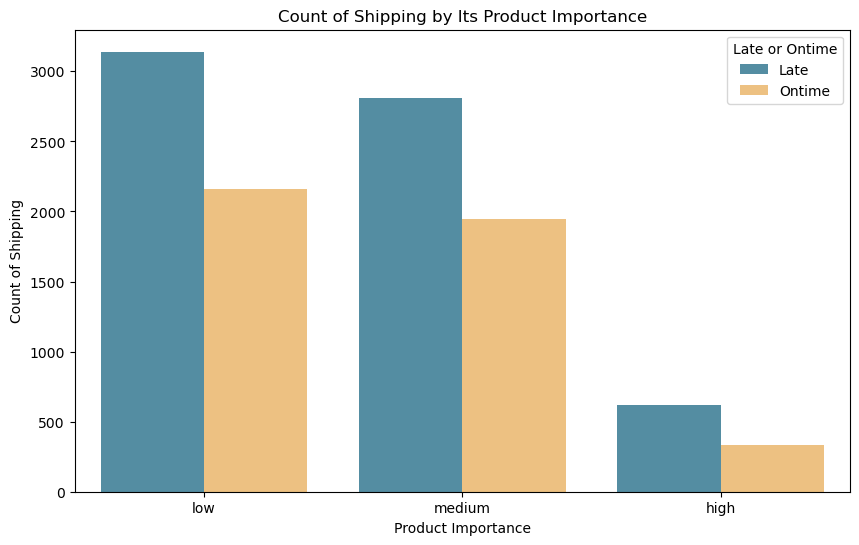

In [163]:
# Checking product late arrival based on its priority
pi_count = df[["Product_importance", "Late_or_ontime"]].value_counts().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = pi_count, x = "Product_importance", y = "count", hue = "Late_or_ontime", palette=["#4793AF", "#FFC470"])
plt.title("Count of Shipping by Its Product Importance")
plt.xlabel("Product Importance")
plt.ylabel("Count of Shipping")
plt.legend(title="Late or Ontime")
plt.show()

In [164]:
df.groupby(["Product_importance"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Product_importance,Late_or_ontime,proportion
0,high,Late,0.649789
1,high,Ontime,0.350211
2,low,Late,0.592788
3,low,Ontime,0.407212
4,medium,Late,0.590450
5,medium,Ontime,0.409550


c:\Users\gembo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

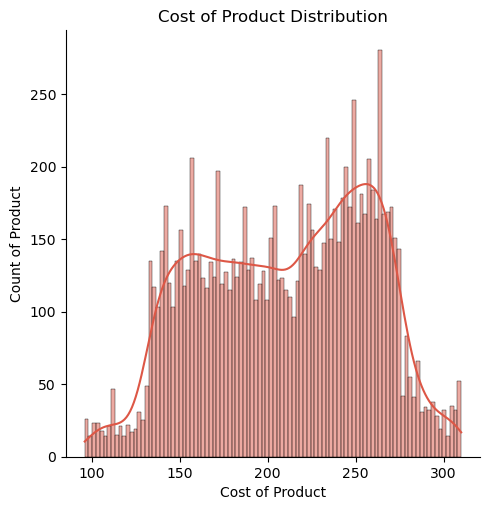

In [165]:
plt.figure(figsize=(10,7))
sns.displot(df["Cost_of_the_Product"], bins = 100, kde=True, color="#DD5746")
plt.title("Cost of Product Distribution")
plt.xlabel("Cost of Product")
plt.ylabel("Count of Product")
plt.show()

In [166]:
df.groupby(["Product_importance"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Product_importance,Customer_satisfaction,proportion
0,high,Dissatisfied,0.406118
1,high,Satisfied,0.399789
2,high,Neutral,0.194093
3,low,Dissatisfied,0.402492
4,low,Satisfied,0.398527
5,low,Neutral,0.198981
6,medium,Dissatisfied,0.396088
7,medium,Satisfied,0.393353
8,medium,Neutral,0.210560


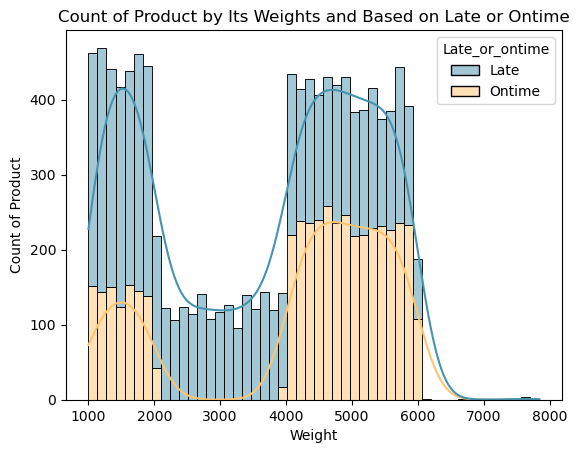

In [167]:
sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Late_or_ontime", multiple="stack", palette=["#4793AF", "#FFC470"])
plt.title("Count of Product by Its Weights and Based on Late or Ontime")
plt.xlabel("Weight")
plt.ylabel("Count of Product")
plt.show()

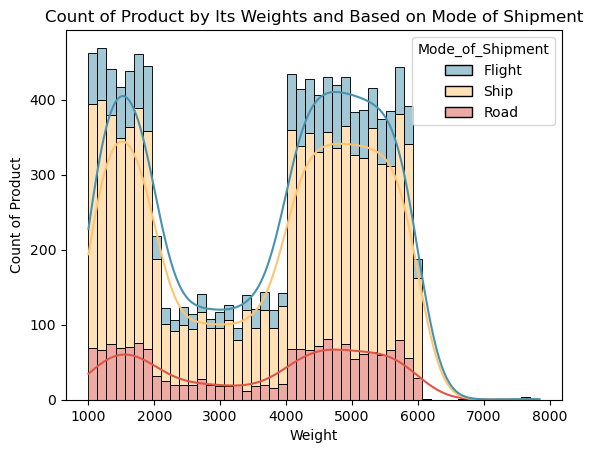

In [168]:
sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Mode_of_Shipment", multiple="stack", palette=["#4793AF", "#FFC470", "#DD5746"])
plt.title("Count of Product by Its Weights and Based on Mode of Shipment")
plt.xlabel("Weight")
plt.ylabel("Count of Product")
plt.show()

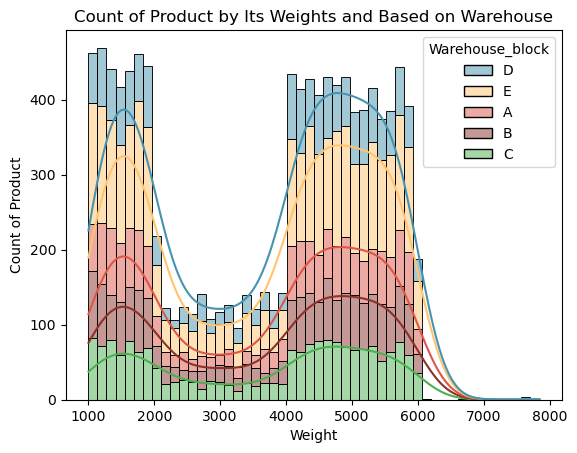

In [169]:
sns.histplot(data=df, x="Weight_in_gms", bins=50, kde=True, hue="Warehouse_block", multiple="stack", palette=["#4793AF", "#FFC470", "#DD5746", "#8B322C", "#4CAF50"])
plt.title("Count of Product by Its Weights and Based on Warehouse")
plt.xlabel("Weight")
plt.ylabel("Count of Product")
plt.show()

Insights that we can get,
1. Majority of products that we sell is low and medium importance.
2. Lowest median cost of the product is actually the high importance product.
3. Product with high importance has a higher late proportion than ontime than the other product importance.
4. Product with high importance has the lowest median cost of product. This could indicate insensitive towards the cost of the product and try to get a big margin in high importance products.
5. Warehouse A has the lowest median cost of the product. Indicating that the products that came out of the warehouse A could have higher profit margin than the other warehouses.
6. We could see that the satisfaction of the customer is closely distributed accross product importance category with customer that satisfied and dissatisfied are more than the one that neutral. This could be because of the late or delay delivery time despite we sell a good quality products.
7. Product with the weight around 1000 to 4000 grams which is a light and medium weight product has a higher late arrival rate then the heavier product. We can improve this with adding more personel to handle the products in each of the warehouse and personel to maintance effectiveness when loading the products into the mode of transport.


### Looking Into Customer

In [170]:
# Looking into customer gender proportion
gender_counts = df["Gender"].value_counts().reset_index()
gender_counts

,Gender,count
0,F,5545
1,M,5454


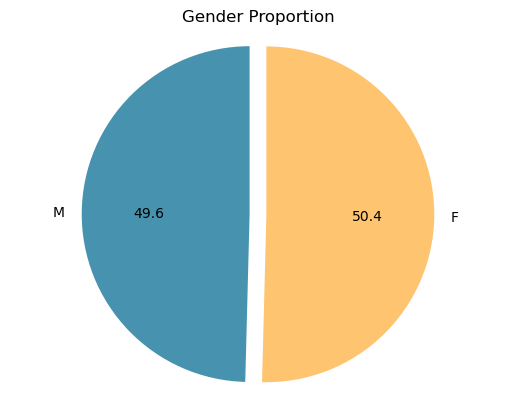

In [171]:
# styling
plt.pie(gender_counts["count"], 
        labels= gender_counts["Gender"],
        autopct="%.1f",
        colors=["#FFC470", "#4793AF"], 
        startangle=90, 
        counterclock=False,
        explode=[0.1, 0])
plt.title("Gender Proportion")
plt.axis("Equal")
plt.show()

In [172]:
df.groupby(["Gender"])[["Prior_purchases", "Discount_offered"]].agg(["median"]).reset_index()

,Gender,Prior_purchases,Discount_offered
,,median,median
0,F,3.0,7.0
1,M,3.0,7.0


In [173]:
df.groupby(["Product_importance"])[["Gender"]].value_counts().reset_index()

,Product_importance,Gender,count
0,high,M,478
1,high,F,470
2,low,F,2652
3,low,M,2645
4,medium,F,2423
5,medium,M,2331


In [174]:
df.groupby(["Gender"])["Late_or_ontime"].value_counts().reset_index()

,Gender,Late_or_ontime,count
0,F,Late,3296
1,F,Ontime,2249
2,M,Late,3267
3,M,Ontime,2187


In [175]:
df.groupby(["Gender"])["Customer_satisfaction"].value_counts().reset_index()

,Gender,Customer_satisfaction,count
0,F,Dissatisfied,2211
1,F,Satisfied,2191
2,F,Neutral,1143
3,M,Dissatisfied,2189
4,M,Satisfied,2169
5,M,Neutral,1096


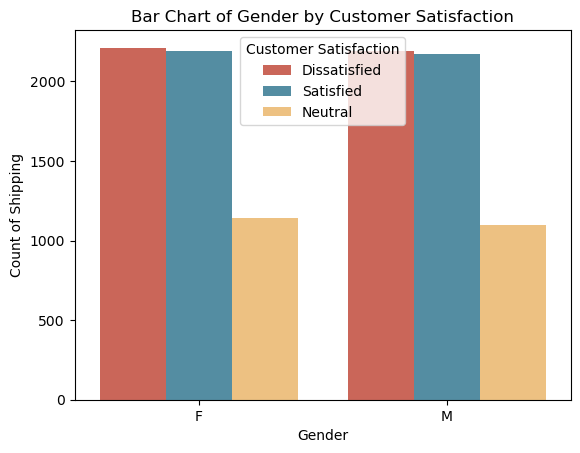

In [209]:
df_g = df.groupby(["Gender"])["Customer_satisfaction"].value_counts().reset_index()
sns.barplot(df_g, x = "Gender", y = "count", hue = "Customer_satisfaction",  palette=[ "#DD5746", "#4793AF", "#FFC470"])
plt.xlabel('Gender')
plt.ylabel('Count of Shipping')
plt.title('Bar Chart of Gender by Customer Satisfaction')
plt.legend(title='Customer Satisfaction')
plt.show()

In [177]:
df.groupby(["Customer_segmentation"])["Gender"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Gender,proportion
0,Loyal,F,0.520362
1,Loyal,M,0.479638
2,Occasional,F,0.501068
3,Occasional,M,0.498932
4,Regular,F,0.507369
5,Regular,M,0.492631


Looking into customer segmentation we can see that,
1. The proportion between male and female customer is almost the same.
2. The average prior purchases between gender is the same and around 3.5, and the discount offered  around 13.
3. There is no significant difference in distribution of the prodcut importances between gender.
4. There is no significant difference in the product arrival time by gender. Product that arrive late is more than ontime.
5. Satisfaction rate closely distributed towards both gender with neutral as lowest amount.

#### Purchasing Behavior

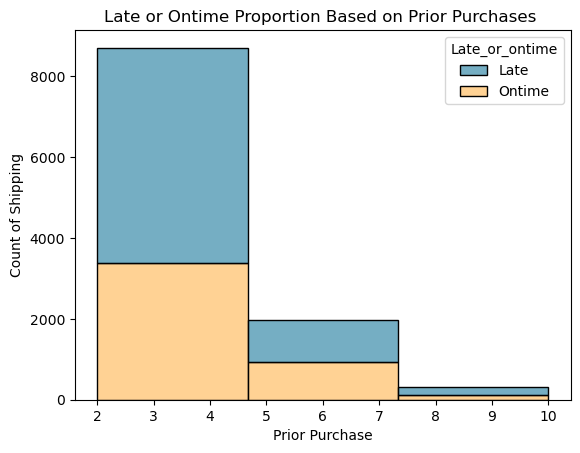

In [178]:
sns.histplot(data=df, x="Prior_purchases", bins=3, hue="Late_or_ontime", multiple="stack", palette=["#4793AF", "#FFC470"])
plt.title("Late or Ontime Proportion Based on Prior Purchases ")
plt.xlabel("Prior Purchase")
plt.ylabel("Count of Shipping")
plt.show()

In [179]:
df.groupby(["Customer_segmentation"])["Late_or_ontime"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Late_or_ontime,proportion
0,Loyal,Late,0.626697
1,Loyal,Ontime,0.373303
2,Occasional,Late,0.634574
3,Occasional,Ontime,0.365426
4,Regular,Late,0.531351
5,Regular,Ontime,0.468649


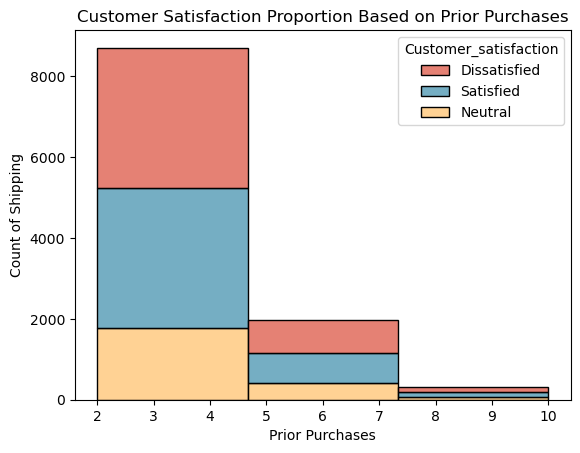

In [211]:
sns.histplot(data=df, x="Prior_purchases", bins=3, hue="Customer_satisfaction", multiple="stack", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Customer Satisfaction Proportion Based on Prior Purchases")
plt.xlabel("Prior Purchases")
plt.ylabel("Count of Shipping")
plt.show()

In [181]:
df.groupby(["Customer_segmentation"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Customer_satisfaction,proportion
0,Loyal,Satisfied,0.416290
1,Loyal,Dissatisfied,0.380090
2,Loyal,Neutral,0.203620
3,Occasional,Dissatisfied,0.403418
4,Occasional,Satisfied,0.394110
5,Occasional,Neutral,0.202472
6,Regular,Satisfied,0.397952
7,Regular,Dissatisfied,0.396702
8,Regular,Neutral,0.205346


<Axes: xlabel='Cost_of_the_Product', ylabel='Discount_offered'>

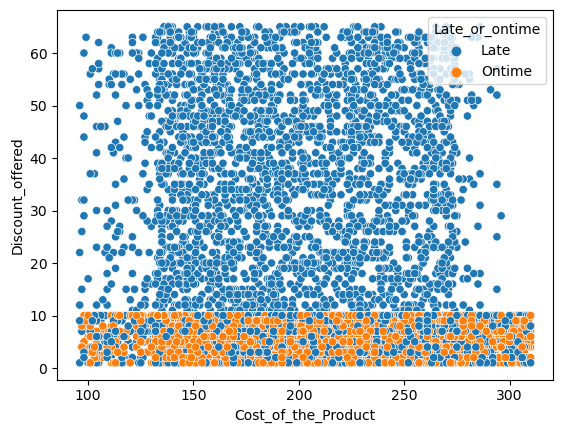

In [205]:
sns.scatterplot(df, x="Cost_of_the_Product", y="Discount_offered", hue= "Late_or_ontime")

<Axes: xlabel='Prior_purchases', ylabel='Discount_offered'>

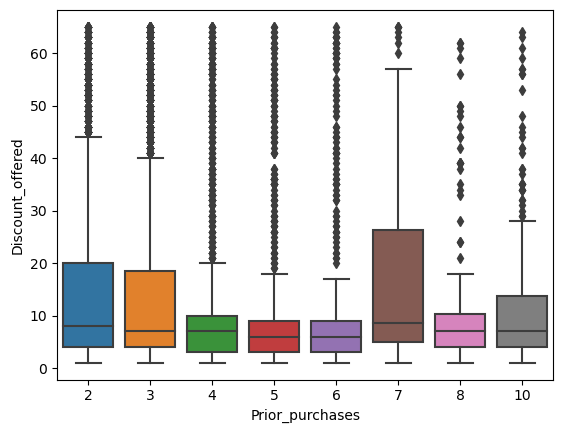

In [183]:
sns.boxplot(df, x="Prior_purchases", y="Discount_offered")

In [185]:
df_proportions = df.groupby("Customer_satisfaction")["Discount_offered"].value_counts(normalize=True).reset_index(name="proportion")
df_proportions.sort_values(by="Discount_offered", ascending=False).reset_index(drop=True)

,Customer_satisfaction,Discount_offered,proportion
0,Satisfied,65,0.002982
1,Neutral,65,0.003573
2,Dissatisfied,65,0.003409
3,Neutral,64,0.002680
4,Dissatisfied,64,0.005455
...,...,...,...
190,Satisfied,2,0.081193
191,Dissatisfied,2,0.073636
192,Satisfied,1,0.074312
193,Dissatisfied,1,0.075000


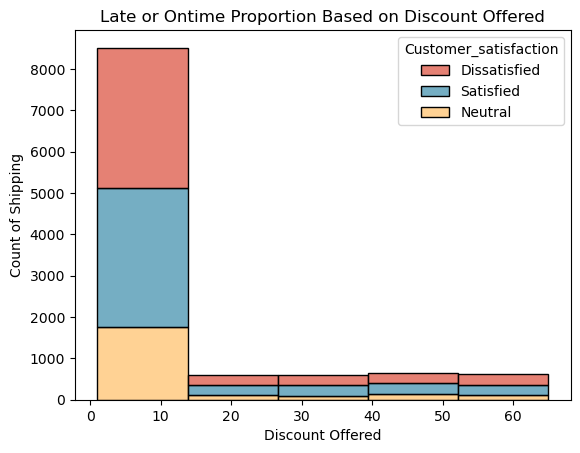

In [203]:
sns.histplot(data=df, x="Discount_offered", bins=5, hue="Customer_satisfaction", multiple="stack", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Late or Ontime Proportion Based on Discount Offered")
plt.xlabel("Discount Offered")
plt.ylabel("Count of Shipping")
plt.show()

Insigths that we get is,
1. Regular customer receive the best ontime rate of 46%
2. Loyal customer has the best satisfaction rate with satisfied rating of 41%
3. Most of the discount offered above 20% doesn't convert into purchases. Maybe we should recheck our discount policy.
4. It seems when the discount offered exceed above 15%, the delivery are always late. Hence the high dissatisfied rate.
5. Satisfied rate are close to the dissatisfied rate, even though alot pf the shipping are late, probably the quality of the product is a possible cause of a high satisfaction rate.

### Looking into customer rating and satisfaction

In [187]:
df["Customer_satisfaction"].value_counts().reset_index()

,Customer_satisfaction,count
0,Dissatisfied,4400
1,Satisfied,4360
2,Neutral,2239


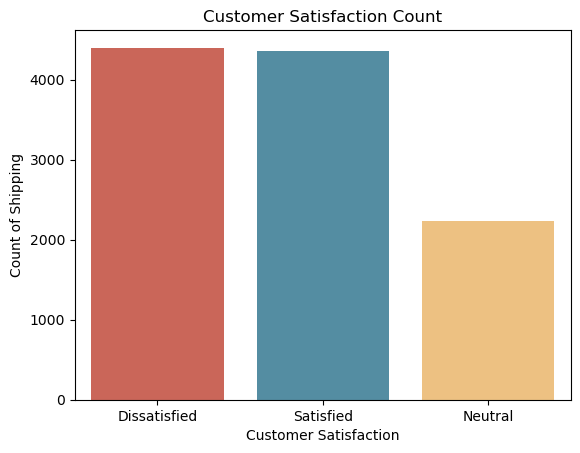

In [204]:
df_cf = df["Customer_satisfaction"].value_counts().reset_index()
sns.barplot(data=df_cf, x="Customer_satisfaction", y="count", palette=["#DD5746", "#4793AF", "#FFC470"])
plt.title("Customer Satisfaction Count")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Count of Shipping")
plt.show()

In [189]:
df.groupby(["Late_or_ontime"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Late_or_ontime,Customer_satisfaction,proportion
0,Late,Satisfied,0.399208
1,Late,Dissatisfied,0.394027
2,Late,Neutral,0.206765
3,Ontime,Dissatisfied,0.408927
4,Ontime,Satisfied,0.392245
5,Ontime,Neutral,0.198828


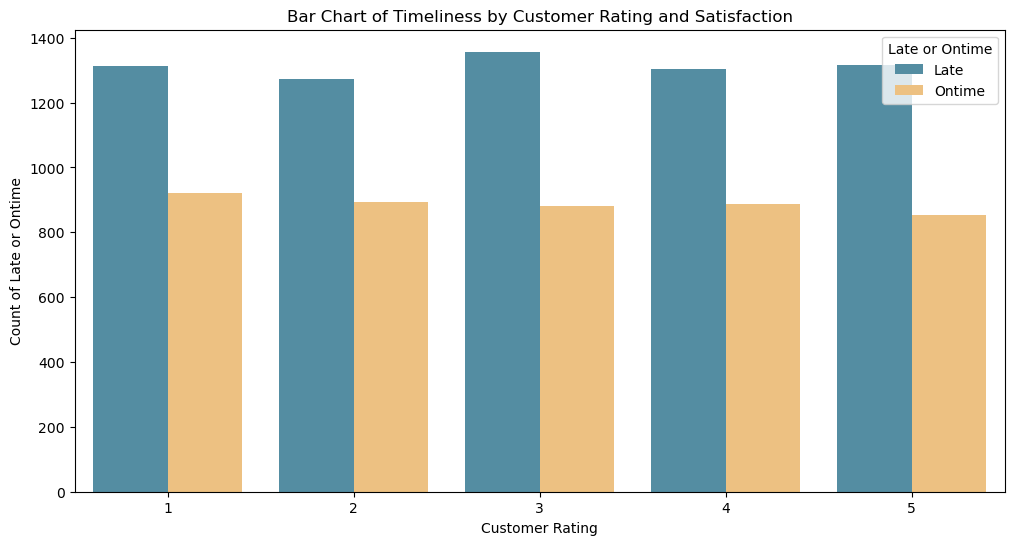

In [190]:
grouped_counts = df.groupby(['Customer_rating', 'Customer_satisfaction', 'Late_or_ontime']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_counts, x='Customer_rating', y='count', hue='Late_or_ontime',  palette=["#4793AF", "#FFC470"])
plt.xlabel('Customer Rating')
plt.ylabel('Count of Late or Ontime')
plt.title('Bar Chart of Timeliness by Customer Rating and Satisfaction')
plt.legend(title='Late or Ontime')
plt.show()

In [213]:
df.groupby(["Warehouse_block"])["Customer_rating"].agg(mean_rating=("mean")).reset_index().sort_values(by="mean_rating", ascending=False)


,Warehouse_block,mean_rating
3,D,3.017993
4,E,2.996727
2,C,2.993999
1,B,2.980360
0,A,2.957447


In [214]:
df.groupby(["Mode_of_Shipment"])["Customer_rating"].agg(mean_rating=("mean")).reset_index().sort_values(by="mean_rating", ascending=False)

,Mode_of_Shipment,mean_rating
1,Road,2.995455
2,Ship,2.991289
0,Flight,2.982555


In [193]:
df.groupby(["Customer_segmentation"])["Customer_satisfaction"].value_counts(normalize=True).reset_index()

,Customer_segmentation,Customer_satisfaction,proportion
0,Loyal,Satisfied,0.416290
1,Loyal,Dissatisfied,0.380090
2,Loyal,Neutral,0.203620
3,Occasional,Dissatisfied,0.403418
4,Occasional,Satisfied,0.394110
5,Occasional,Neutral,0.202472
6,Regular,Satisfied,0.397952
7,Regular,Dissatisfied,0.396702
8,Regular,Neutral,0.205346


A summary that we can conclude is, it seems even though the late delivery are more than the ontime ones. The satisfaction rate is closely distribute between satisfied and dissatisfied, followed by neutral rating. This could be because the products that we sell has a good feedback from the customers but they not satisfied with the delivery time. So our goal is,
1. Increase the ontime delivery rate by 10% in 3 months.
2. Decrease the dissatisfied customer rating by 5% and convert the neutral rating into satisfied by 10% in 3 months.

## Importing Data
Importing data to csv to make a Tableau dashboard and story.

In [194]:
df.to_csv('online_retail_shipping.csv', index=False, sep=';', encoding='utf-8', header=True)